# ML project checklist
1. Frame the problem and look at the big picture
2. Get the data
3. Exploratory Data Analysis (EDA)
4. Prepare the data to better expose the underlying data patterns to ML algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine into a great solution
7. Present your solution
8. Launch mpnitor and maintain your system


# 1. Frame the problem

# 2. Get the data

# 3. Exploratory Data Analysis

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`.

### Iris dataset

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print(iris.data.shape, len(iris.target))

(150, 4) 150


In [49]:
# Here the target appears as index
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['target'] = pd.Series(iris.target) 

In [50]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


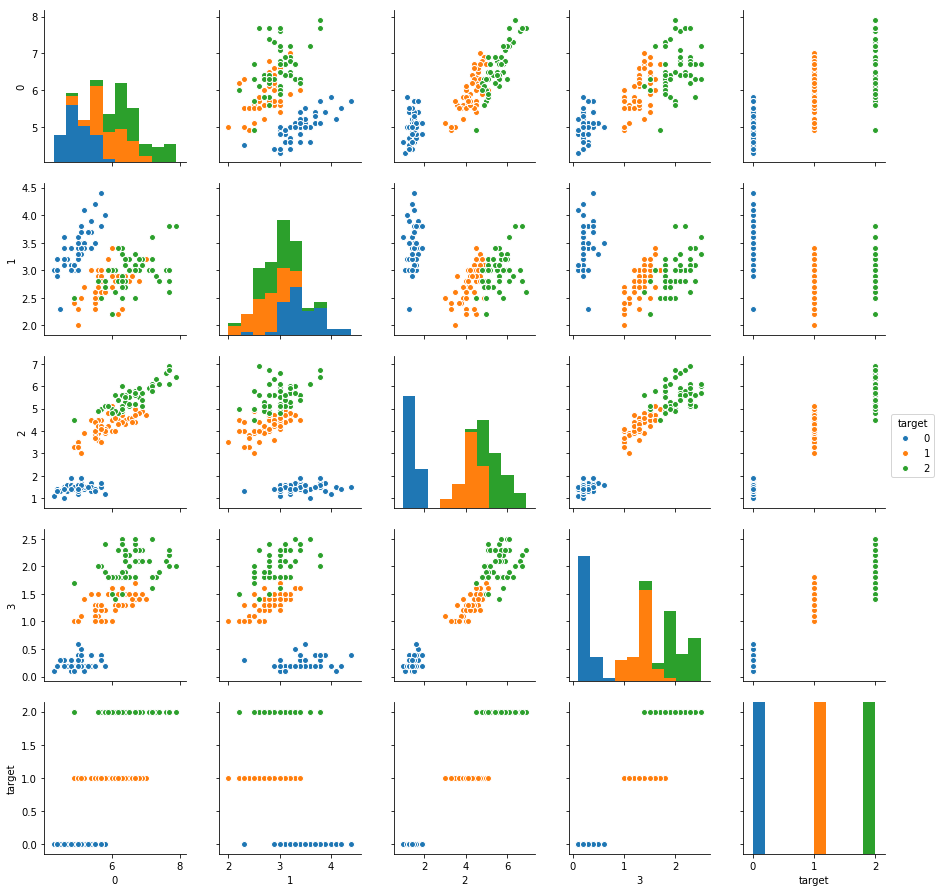

In [32]:
sns.pairplot(df, hue='target') # view the features and target data

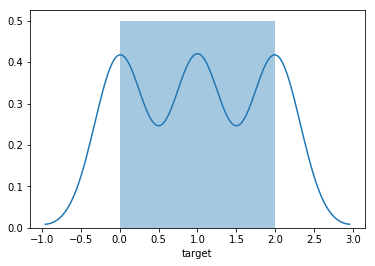

In [36]:
sns.distplot(df.target)

In [51]:
df.corr() # make a correlation table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


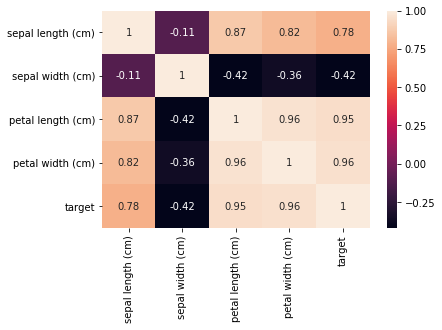

In [76]:
sns.heatmap(df.corr(), annot=True) # make a correlation heatmap

### olivetti dataset

(400, 4096)
64.0
the target assigned to this image? 0 

These are the unique targets [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] 

This is the bin distribution for each target [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 



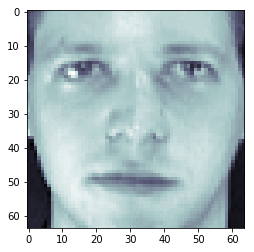

In [69]:
from sklearn.datasets import fetch_olivetti_faces

# view the data, 400 images of 4096 pixels
data = fetch_olivetti_faces()
print(data.data.shape)
print(np.sqrt(4096))
plt.imshow(data.data[0].reshape(64,64), cmap=plt.cm.bone)
print('the target assigned to this image?', data.target[0], '\n')
print('These are the unique targets', np.unique(data.target), '\n')
print('This is the bin distribution for each target', np.bincount(data.target), '\n')

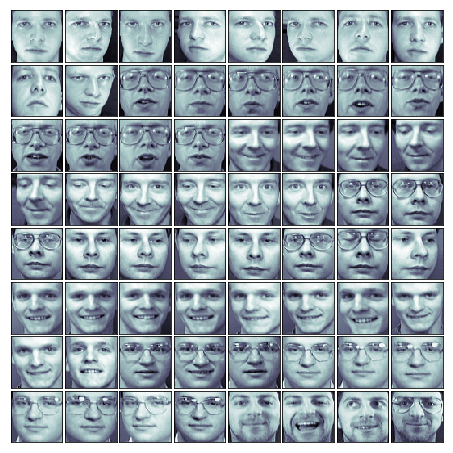

In [74]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.bone, interpolation='nearest')

In [75]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


# 4. Prepare the data 
### Data Splitting

We **must** split some test data from the train data. The estimator can learn by heart and overfit if we supply it all training data. By keeping a test dataset we can see how the estimator perfoems with new data.

Especially for relatively small datasets, it's better to stratify the split. Stratification means that we maintain the original class proportion of the dataset in the test and training sets. Stratify used a lot in classifiers. For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

```python
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)
```

In [82]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

In [85]:
print('All: ', np.bincount(y)/float(len(y))*100)
print('Training: ', np.bincount(train_y)/float(len(train_y))*100)
print('Test: ', np.bincount(test_y)/float(len(test_y))*100)

All:  [33.33333333 33.33333333 33.33333333]
Training:  [33.33333333 33.33333333 33.33333333]
Test:  [33.33333333 33.33333333 33.33333333]


In [88]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print('Fraction Correct[Accuracy:]')
print(np.sum(pred_y == test_y)/float(len(test_y)))

Fraction Correct[Accuracy:]
0.9466666666666667


In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       0.96      0.88      0.92        25
          2       0.89      0.96      0.92        25

avg / total       0.95      0.95      0.95        75



In [104]:
# Visualize correct and failed predictions
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
[44 49 54 60]


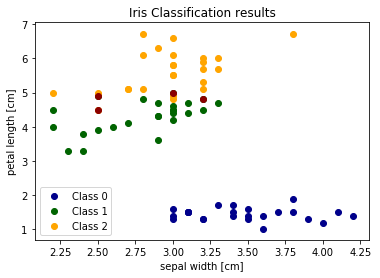

In [106]:
# Plot two dimensions

colors = ["darkblue", "darkgreen", "orange"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

### Normalization
##### KNN

# 5. Explore Models

![image](http://scikit-learn.org/stable/_static/ml_map.png)

# Linear Regression
- Assume the data is clean and feature/target are in columns of a pandas dataframe

##### EDA
```python
sns.pairplot(df) # view the features and target data
sns.distplot([df['target']]) # view target distribution
df.corr() # make a correlation table
sns.heatmap(df.corr(), annot=True) # make a correlation heatmap
```

#####  Assign, split and fit
```python
X = df[['feature_0', 'feature_1']]
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) # Tuple unpacking

from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Instantiate the object
lm.fit(X_train, y_train) # fit the model
```

##### Coefficients, Predictions and Residuals
```python
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) # make coefficients
predictions = lm.predict(X_test) # make X_test predictions from X_train/y_train data
sns.jointplot(y_test, predictions) # plot predictions vs actual y_test values
sns.distplot((y_test-predictions)) # Histogram of residuals

# Which samples correctly/incorrectly classified
correct_idx = np.where(pred_y == test_y)#[0]
print(correct_idx)

incorrect_idx = np.where(pred_y != test_y)#[0]
print(incorrect_idx)
```

##### Plots
```python
sns.jointplot(y_test, predictions) # scatter actual vs predictions
sns.distplot((y_test-predictions)) # histogram of residuals
```

##### Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

```python
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions) # Mean Average Error
metrics.mean_squared_error(y_test, predictions) # Mean Squared Error
np.sqrt(metrics.mean_absolute_error(y_test, predictions)) # Root Mean Squared Error
metrics.explained_variance_score(y_test, predictions) # R^2. How much variance the model explains
```

# Logistic Regression
- A method for classification, 0 to 1
- Non-continuous, discrete categories, eg., binary groups

### $\theta(z) = \frac{1}{1 + exp(-z)}$

Logistic slope

### $p = \frac{1}{1 + e^{(b_0 + b_1x)}}$

##### EDA
```python
sns.pairplot(df) # view the features and target data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # view all missing data
sns.distplot([df['target']]) # view target distribution
```

##### prep the data
```python
# Impute some data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
            
    else:
        return Age
        
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) # Fill in age

sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, sex, embark], axis=1)

train.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True) # Drop all numerical
```

##### Assign, split and fit
```python
# assign
X = train.drop('Survived', axis=1)
y = train['Survived']

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# fit
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
```

##### Predictions and Evaluations
```python
# Predictions
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
```

# K Nearest neighbours

##### EDA
```python
sns.pairplot(c_data,hue='TARGET CLASS',palette='bwr')
```

##### Prep data - scaling
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler object to feature columns only
scaler.fit(c_data.drop('TARGET CLASS', axis=1)) 

# Use scalar object to do a transformation
scaled_features = scaler.transform(c_data.drop('TARGET CLASS', axis=1))

# Convert transformation array to a pandas dataframe
df_feat = pd.DataFrame(scaled_features, columns=c_data.columns[:-1])
```

##### Assign, split, fit - First run through
```python
# Assign
X = df_feat
y = c_data['TARGET CLASS']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
```

##### Plot K performance
```python
fig, ax =plt.subplots(figsize=(10,6))
ax.plot(range(1,40), 
         error_rate, 
         color='blue', 
         linestyle='dashed', 
         marker='o',
        markerfacecolor='red',
        markersize=10,)
```

##### refit with best K
```python
from sklearn.metrics import classification_report, confusion_matrix

# Find best k from plot
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
```

##### Predictions and Evaluations
```python
from sklearn.metrics import classification_report, confusion_matrix
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

```

##### Plot results
```python

```

# Decision Trees

https://www.youtube.com/watch?v=LDRbO9a6XPU&t=382s

1. Quantify how much a question serves to unimix the labels 
2. Gini impurity = Amount of uncertainty at a node
3. We can quantify how much a question reduces Gini uncertainty by measuring information gain
4. We can use information gain to dictate which question to ask at each node
5. Thus we need to know 
    - which questions to ask
    - when to ask them

Each node takes a list of rows and iterates over every value of every feature. Each feature-value can be used as a threshold to partition the data in the form of a question.

The best question is the one that reduces our uncertainty the most. Gini impurity (0 to 1)quantifies the uncertainty at a node. Information gain quantifies how much a question reduces that.

Gini impurity. The chance of being INCORRECT if you randomly assign a label to an example in the same set.

### $\mathit{Gini}(E) = 1 - \sum_{j=1}^{c}p_j^2$

### $ = 1 - p_j$

Which questions to ask?
1. Find the Gini impurity of current node
2. Look at dataset in that node, choose a question (we will iterate over all questions)
3. Partition child nodes for that question. Calculate the weighted average of the uncertainty in those child nodes.
4. Subtract this uncertainty from our starting uncertainty to yield the information gain.
5. Iterate to the next question in the list and perform the same methods.
6. We choose to apply the question that yields that largest information gain.

##### Assign, split, fit
```python
# Assign
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
```

##### Predictions and Evaluations
```python
# Predictions
predictions = dtree.predict(X_test)

# Evaluations
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
```

##### Visualisation
```python
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(data.columns[1:])

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

```

# Random Forests

##### Assign, split, fit
```python
# Assign
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
```

##### Predictions and Evaluations
```python
rfc_predictions = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

```

# Support Vector Machines

```python

```

# K means clustering

```python

```

# Principal Component Analysis

```python

```

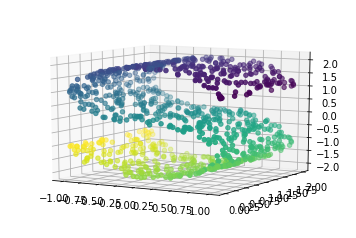

In [6]:
# use for dimensionality reduction
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10,-60)

# Recommender Systems

```python

```

# Natural Language Processing

```python

```

# Big Data & Spark

```python

```

# Neural Nets & Deep Learning

```python

```

# Naive Bayes

```python

```

# Hippocampus Bayes

```python

```